In [30]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = [8,6]

#std          mu0_andy   = 5.250480e-02
#std          phi_andy   = 2.874982e+06
#std          R2_andy    = 0.709763



/usr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: genfromtxt: Empty input file: "/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/andy_WT/estimateMSP.std.-IPTG"
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: genfromtxt: Empty input file: "/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/andy_Triple/estimateMSP.std.-IPTG"


<IPython.core.display.Javascript object>


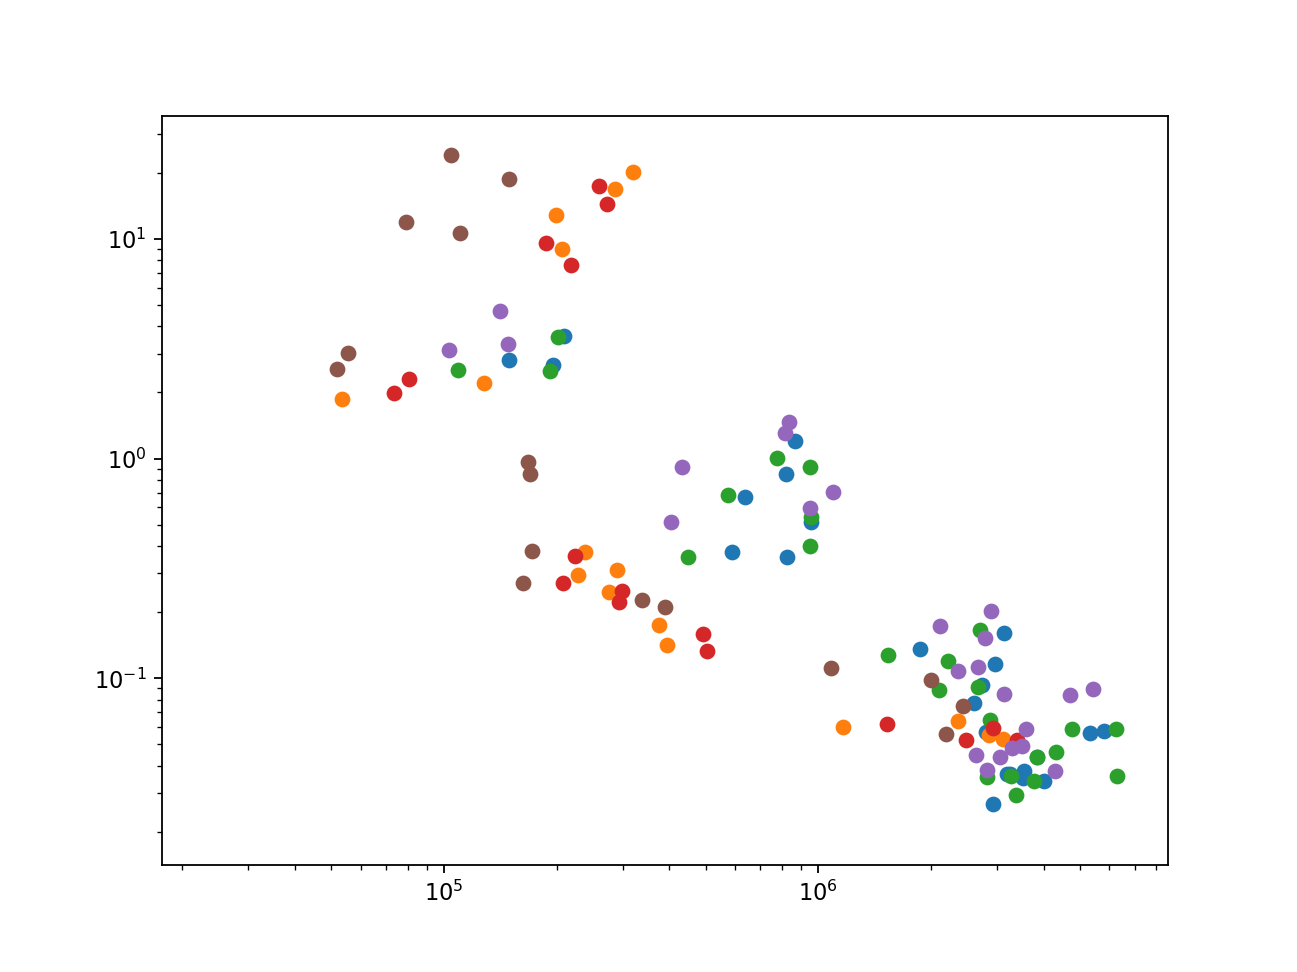

#std          mu0_philip = 5.803148e-02
#std          phi_philip = 1.294178e+06
#std          R2_philip  = 0.270805

[0.05748463 0.0437054  0.05632436 3.624486   2.821779   2.665014
 0.09326142 0.07726039 0.0566998  0.135914   0.116537   0.160294
 0.03656719 0.03500642 0.02670186 0.03408709 0.0379398  0.03654146
 0.5162316  0.3575375  0.3747762  1.199175   0.854619   0.6677024 ]
[12.87667     9.034185   20.05997    16.7834      0.06371377  0.06014372
  1.87369     2.200761    0.2469986   0.3110366   0.2946465   0.3765632
  0.05515685  0.05311157  0.1415448   0.1739405 ]
[ 0.05748463  0.0437054   0.05632436  3.624486    2.821779    2.665014
  0.09326142  0.07726039  0.0566998   0.135914    0.116537    0.160294
  0.03656719  0.03500642  0.02670186  0.03408709  0.0379398   0.03654146
  0.5162316   0.3575375   0.3747762   1.199175    0.854619    0.6677024
 12.87667     9.034185   20.05997    16.7834      0.06371377  0.06014372
  1.87369     2.200761    0.2469986   0.3110366   0.2946465   0

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: genfromtxt: Empty input file: "/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/andy_WT/estimateMSP.binarized.-IPTG"
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: genfromtxt: Empty input file: "/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/andy_Triple/estimateMSP.binarized.-IPTG"
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: genfromtxt: Empty input file: "/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/andy_WT/estimateMSP.nonbinarized.-IPTG"
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: genfromtxt: Empty input file: "/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/andy_Triple/estimateMSP.nonbinarized.-IPTG"


In [32]:
datadir = '/home/lukas/projects/antibiotics/experiments/200129_AllData/'


def ComputeR2(listmu,listtau,mu0,phi):
    yi    = np.log(listmu)
    fi    = np.log(mu0*phi**2/listtau**2)
    ymean = np.mean(yi)
    
    ssres = np.sum((yi-fi)**2)
    sstot = np.sum((yi-ymean)**2)
    
    return 1. - ssres/sstot



############################
### compute phi & R2     ###
############################

mu_tau_prod  = 1.
mu_tau_count = 0
mu0_sum      = 0.
mu0_count    = 0

methods = ['std','binarized','nonbinarized']
names = ['andy','philip']

list_mu      = {}
list_tau     = {}
mu_tau_prod  = {}
mu_tau_count = {}
mu0_sum      = {}
mu0_count    = {}

for method in methods:
    
    list_mu[method]      = {}
    list_tau[method]     = {}
    mu_tau_prod[method]  = {}
    mu_tau_count[method] = {}
    mu0_sum[method]      = {}
    mu0_count[method]    = {}
    
    for name in names:

        list_mu[method][name]      = []
        list_tau[method][name]     = []
        mu_tau_prod[method][name]  = 1.
        mu_tau_count[method][name] = 0
        mu0_sum[method][name]      = 0.
        mu0_count[method][name]    = 0

        
        for fn in glob.glob(datadir + name + '/' + name + '_*/estimateMSP.' + method + '*'):
            a = np.genfromtxt(fn)
                
            if len(a) > 0:
                if ('WT' in fn and name == 'andy') or ('None' in fn and name == 'philip'):
                    mu0_sum[method][name]   += np.sum(a[:,1])
                    mu0_count[method][name] += len(a[:,1])

                mu_tau_prod[method][name]   *= np.prod(np.sqrt(a[:,1]) / a[:,3])
                mu_tau_count[method][name]  += len(a[:,1])
                
                for mu in a[:,1]:
                    list_mu[method][name].append(mu)
                for itau in a[:,3]:
                    list_tau[method][name].append(1./itau)
                
        list_mu[method][name] = np.array(list_mu[method][name])
        list_tau[method][name] = np.array(list_tau[method][name])
        
        mu0 = mu0_sum[method][name]/mu0_count[method][name]
        phi = np.power(mu_tau_prod[method][name],1./mu_tau_count[method][name])/np.sqrt(mu0)    

        r2 = ComputeR2(list_mu[method][name],list_tau[method][name],mu0,phi)

        print('#{:12s} mu0_{:6s} = {:.6e}'.format(method,name,mu0))
        print('#{:12s} phi_{:6s} = {:.6e}'.format(method,name,phi))
        print('#{:12s} R2_{:6s}  = {:.6f}'.format(method,name,r2))
        print()
        
        plt.scatter(list_tau[method][name],list_mu[method][name])
        
    mu0avg = np.sum([mu0_sum[method][n] for n in names])/np.sum([mu0_count[method][n] for n in names])
    phiavg = np.power(np.prod([mu_tau_prod[method][n] for n in names]),1./np.sum([mu_tau_count[method][n] for n in names]))/mu0avg
    
    a = np.concatenate([list_mu[method][n] for n in names])
    print(list_mu[method]['andy'])
    print(list_mu[method]['philip'])
    print(a)
                       
    
    r2avg  = ComputeR2(np.concatenate([list_mu[method][n] for n in names]),np.concatenate([list_tau[method][n] for n in names]),mu0avg,phiavg)
    
    print('#{:12s} mu0_{:6s} = {:.6e}'.format(method,'both',mu0avg))
    print('#{:12s} phi_{:6s} = {:.6e}'.format(method,'both',phiavg))
    print('#{:12s} R2_{:6s}  = {:.6f}'.format(method,'both',r2avg))
    print()
3